In [3]:
name_list = ['nick', 'egon', 'jason', ]
x, y, z = name_list

print(f"x:{x}, y:{y}, z:{z}")

x:nick, y:egon, z:jason


In [6]:
name = input("name")
print(type(name))

<class 'str'>


In [14]:
s1 = 'hello'
try:
    int(s1)
except IndexError as e:
    print(e)
except KeyError as e:
    print(e)
except ValueError as e:
    print(e)
#except Exception as e:
#    print(e)
else:
    print('try内代码块没有异常则执行我')
finally:
    print('无论异常与否，都会执行该模块，通常是进行清理工作')

invalid literal for int() with base 10: 'hello'
无论异常与否，都会执行该模块，通常是进行清理工作


In [24]:
info = 'nick:male:19'

print(f"info.rsplit(':', 1): {info.rsplit(':', 1)}")  # 从右开始切割

info.rsplit(':', 1): ['nick:male', '19']


In [32]:
with open("test_1.txt", "r") as f:
    # data = f.read()
    # print(data)
    data_1 = f.readlines()
    print(data_1)

['abcd test afg\n', 'abxy\n', '\n', 'faker\n', 'asdf\n', 'zpl']


In [38]:

def func():
    print('from func 1')
    yield 'a'
    print('from func 2')
    yield 'b'


g = func()
print(F"g.__iter__ == g: {g.__iter__() == g}")

res1 = g.__next__()
print(f"res1: {res1}")

res2 = next(g)
print(f"res2: {res2}")

# next(g)  # StopIteration

g.__iter__ == g: True
from func 1
res1: a
from func 2
res2: b


StopIteration: 

In [4]:
import datetime
print(datetime.datetime.now())
print(type(datetime.datetime.now()))

2025-02-17 12:27:48.597629
<class 'datetime.datetime'>


In [5]:
import random
print(random.choice([1, '23', [4, 5]]))

23


In [6]:
import os
os.listdir("./dir1")

['m1.py', 'm2.py', '__pycache__']

In [10]:
import os
import logging.config

# 定义三种日志输出格式 开始
standard_format = '[%(asctime)s][%(threadName)s:%(thread)d][task_id:%(name)s][%(filename)s:%(lineno)d]' \
                  '[%(levelname)s][%(message)s]'  # 其中name为getLogger()指定的名字；lineno为调用日志输出函数的语句所在的代码行
simple_format = '[%(levelname)s][%(asctime)s][%(filename)s:%(lineno)d]%(message)s'
id_simple_format = '[%(levelname)s][%(asctime)s] %(message)s'
# 定义日志输出格式 结束

logfile_dir = os.path.dirname("dir1")  # log文件的目录，需要自定义文件路径 # atm
logfile_dir = os.path.join(logfile_dir, 'log')  # C:\Users\oldboy\Desktop\atm\log

logfile_name = 'log.log'  # log文件名，需要自定义路径名

# 如果不存在定义的日志目录就创建一个
if not os.path.isdir(logfile_dir):  # C:\Users\oldboy\Desktop\atm\log
    os.mkdir(logfile_dir)

# log文件的全路径
logfile_path = os.path.join(logfile_dir, logfile_name)  # C:\Users\oldboy\Desktop\atm\log\log.log
# 定义日志路径 结束

# log配置字典
LOGGING_DIC = {
    'version': 1,
    'disable_existing_loggers': False,
    'formatters': {
        'standard': {
            'format': standard_format
        },
        'simple': {
            'format': simple_format
        },
    },
    'filters': {},  # filter可以不定义
    'handlers': {
        # 打印到终端的日志
        'console': {
            'level': 'DEBUG',
            'class': 'logging.StreamHandler',  # 打印到屏幕
            'formatter': 'simple'
        },
        # 打印到文件的日志,收集info及以上的日志
        'default': {
            'level': 'INFO',
            'class': 'logging.handlers.RotatingFileHandler',  # 保存到文件
            'formatter': 'standard',
            'filename': logfile_path,  # 日志文件
            'maxBytes': 1024 * 1024 * 5,  # 日志大小 5M  (*****)
            'backupCount': 5,
            'encoding': 'utf-8',  # 日志文件的编码，再也不用担心中文log乱码了
        },
    },
    'loggers': {
        # logging.getLogger(__name__)拿到的logger配置。如果''设置为固定值logger1，则下次导入必须设置成logging.getLogger('logger1')
        '': {
            # 这里把上面定义的两个handler都加上，即log数据既写入文件又打印到屏幕
            'handlers': ['default', 'console'],
            'level': 'DEBUG',
            'propagate': False,  # 向上（更高level的logger）传递
        },
    },
}



def load_my_logging_cfg():
    logging.config.dictConfig(LOGGING_DIC)  # 导入上面定义的logging配置
    logger = logging.getLogger(__name__)  # 生成一个log实例
    logger.info('It works!')  # 记录该文件的运行状态
    
    return logger


if __name__ == '__main__':
    load_my_logging_cfg()

[INFO][2025-02-17 15:39:51,421][4243304314.py:71]It works!


In [11]:
import numpy as np

In [14]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(arr)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [15]:
print(arr[:,:1])

[[1]
 [5]
 [9]]


In [18]:
arr1 = arr.copy()
arr1[:1, :] = 0
arr1

array([[ 0,  0,  0,  0],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [19]:
arr1 = np.array([[1, 2], [3, 4], [5, 6]])
arr2 = np.array([[7, 8], [9, 10], [11, 12]])

In [23]:
print(np.hstack((arr1, arr2)))
print(np.vstack((arr1, arr2)))

[[ 1  2  7  8]
 [ 3  4  9 10]
 [ 5  6 11 12]]
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [25]:
print(np.concatenate((arr1, arr2), axis=1))

[[ 1  2  7  8]
 [ 3  4  9 10]
 [ 5  6 11 12]]


In [27]:
print(np.arange(1,20, 2))

[ 1  3  5  7  9 11 13 15 17 19]


In [34]:
print(np.empty((4, 4)))

[[4.67296746e-307 1.69121096e-306 1.11258107e-307 1.89146896e-307]
 [7.56571288e-307 3.11525958e-307 1.24610723e-306 1.29061142e-306]
 [1.42418987e-306 1.60219035e-306 6.89809565e-307 1.22383391e-307]
 [1.05695252e-307 1.27946330e-307 1.33509100e-307 2.56765117e-312]]


In [37]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr1.shape)
arr2 = np.array([[7, 8], [9, 10], [11, 12]])
print(arr2.shape)


(2, 3)
(3, 2)


In [38]:
print(np.dot(arr1, arr2))

[[ 58  64]
 [139 154]]


In [41]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(np.median(arr))

5.0


In [42]:
print(np.random.randint(1, 5, 10))

[1 2 2 2 2 2 3 1 2 1]


## Pandas

In [43]:
import numpy as np
import pandas as pd

In [48]:
df =  pd.Series(range(1, 5), index=['a', 'b', 'c', 'd'])
print(df)
print(df.values)
print(df.index)

a    1
b    2
c    3
d    4
dtype: int64
[1 2 3 4]
Index(['a', 'b', 'c', 'd'], dtype='object')


In [58]:
arr = np.array([1, 2, 3, 4, np.nan])
df = pd.Series(arr, index=['a', 'b', 'c', 'd', 'e'])
print(df.dropna())
df

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64


a    1.0
b    2.0
c    3.0
d    4.0
e    NaN
dtype: float64

In [60]:
dates = pd.date_range('20190101', periods=6, freq='M')
print(dates)

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30'],
              dtype='datetime64[ns]', freq='M')


In [59]:
np.random.seed(1)
arr = 10 * np.random.randn(6, 4)
print(arr)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]
 [-11.00619177  11.4472371    9.01590721   5.02494339]]


In [62]:
df = pd.DataFrame(arr, index=dates, columns=['c1', 'c2', 'c3', 'c4'])
df

,c1,c2,c3,c4
2019-01-31,16.243454,-6.117564,-5.281718,-10.729686
2019-02-28,8.654076,-23.015387,17.448118,-7.612069
2019-03-31,3.190391,-2.493704,14.621079,-20.601407
2019-04-30,-3.224172,-3.840544,11.337694,-10.998913
2019-05-31,-1.724282,-8.778584,0.422137,5.828152
2019-06-30,-11.006192,11.447237,9.015907,5.024943


In [78]:
df.sort_values(by='c2')

,c1,c2,c3,c4
2019-02-28,8.654076,-23.015387,17.448118,-7.612069
2019-05-31,-1.724282,-8.778584,0.422137,5.828152
2019-01-31,16.243454,-6.117564,-5.281718,-10.729686
2019-04-30,-3.224172,-3.840544,11.337694,-10.998913
2019-03-31,3.190391,-2.493704,14.621079,-20.601407
2019-06-30,-11.006192,11.447237,9.015907,5.024943


In [86]:
df.loc[:]

,c1,c2,c3,c4
2019-01-31,16.243454,-6.117564,-5.281718,-10.729686
2019-02-28,8.654076,-23.015387,17.448118,-7.612069
2019-03-31,3.190391,-2.493704,14.621079,-20.601407
2019-04-30,-3.224172,-3.840544,11.337694,-10.998913
2019-05-31,-1.724282,-8.778584,0.422137,5.828152
2019-06-30,-11.006192,11.447237,9.015907,5.024943


In [87]:
import pandas as pd
from io import StringIO
test_data = '''
5.1,,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,,0.2
7.0,3.2,4.7,1.4
6.4,3.2,4.5,1.5
6.9,3.1,4.9,
,,,
'''

test_data = StringIO(test_data)
df = pd.read_csv(test_data, header=None)
df.columns = ['c1', 'c2', 'c3', 'c4']
df

,c1,c2,c3,c4
0,5.1,NaN,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,NaN,0.2
3,7.0,3.2,4.7,1.4
4,6.4,3.2,4.5,1.5
5,6.9,3.1,4.9,NaN
6,NaN,NaN,NaN,NaN


In [89]:
df.isnull()
print(df.isnull().sum())

c1    1
c2    2
c3    2
c4    2
dtype: int64


In [90]:
strtext = '[{"ttery":"min","issue":"20130801-3391","code":"8,4,5,2,9","code1":"297734529","code2":null,"time":1013395466000},\
{"ttery":"min","issue":"20130801-3390","code":"7,8,2,1,2","code1":"298058212","code2":null,"time":1013395406000},\
{"ttery":"min","issue":"20130801-3389","code":"5,9,1,2,9","code1":"298329129","code2":null,"time":1013395346000},\
{"ttery":"min","issue":"20130801-3388","code":"3,8,7,3,3","code1":"298588733","code2":null,"time":1013395286000},\
{"ttery":"min","issue":"20130801-3387","code":"0,8,5,2,7","code1":"298818527","code2":null,"time":1013395226000}]'

df = pd.read_json(strtext, orient='records')
df

,ttery,issue,code,code1,code2,time
0,min,20130801-3391,"8,4,5,2,9",297734529,NaN,1013395466000
1,min,20130801-3390,"7,8,2,1,2",298058212,NaN,1013395406000
2,min,20130801-3389,"5,9,1,2,9",298329129,NaN,1013395346000
3,min,20130801-3388,"3,8,7,3,3",298588733,NaN,1013395286000
4,min,20130801-3387,"0,8,5,2,7",298818527,NaN,1013395226000


## Matplotlib

In [94]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
# font = FontProperties(fname='/Library/Fonts/Heiti.ttc')

[DEBUG][2025-02-17 21:40:08,018][pyplot.py:280]Loaded backend module://matplotlib_inline.backend_inline version unknown.


[0, 1, 2, 3]


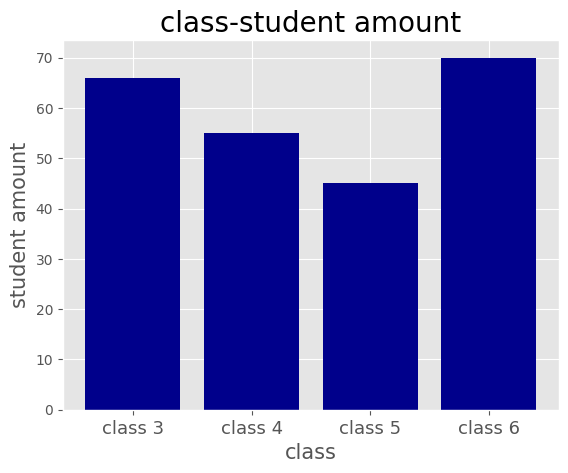

In [99]:
# 修改背景为条纹
plt.style.use('ggplot')

classes = ['class 3', 'class 4', 'class 5', 'class 6']

classes_index = range(len(classes))
print(list(classes_index))

student_amounts = [66, 55, 45, 70]

# 画布设置
fig = plt.figure()
# 1,1,1表示一张画布切割成1行1列共一张图的第1个；2,2,1表示一张画布切割成2行2列共4张图的第一个（左上角）
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(classes_index, student_amounts, align='center', color='darkblue')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

plt.xticks(classes_index,
           classes,
           rotation=0,
           fontsize=13)
plt.xlabel('class', fontsize=15)
plt.ylabel('student amount', fontsize=15)
plt.title('class-student amount', fontsize=20)
# 保存图片，bbox_inches='tight'去掉图形四周的空白
# plt.savefig('classes_students.png?x-oss-process=style/watermark', dpi=400, bbox_inches='tight')
plt.show()

## 面向对象

In [100]:
# 注意类中定义变量使用驼峰体
class OldboyStudent():
    school = 'oldboy'

    def choose_course(self):
        print('is choosing course')

In [101]:
print(OldboyStudent.__dict__)

{'__module__': '__main__', 'school': 'oldboy', 'choose_course': <function OldboyStudent.choose_course at 0x000001D14F68F0D0>, '__dict__': <attribute '__dict__' of 'OldboyStudent' objects>, '__weakref__': <attribute '__weakref__' of 'OldboyStudent' objects>, '__doc__': None}


In [102]:
class Parent1:
    pass


class Parent2:
    pass


class Sub1(Parent1, Parent2):
    pass

In [103]:
print(Sub1.__bases__)

(<class '__main__.Parent1'>, <class '__main__.Parent2'>)


In [104]:

#coding=utf-8
# ############### 定义 ###############
class Goods:
    """python3中默认继承object类
        以python2、3执行此程序的结果不同，因为只有在python3中才有@xxx.setter  @xxx.deleter
    """

    @property
    def price(self):
        print('@property')

    @price.setter
    def price(self, value):
        print('@price.setter')

    @price.deleter
    def price(self):
        print('@price.deleter')



In [107]:
good = Goods()

del good.price

@price.deleter


In [108]:
class People:
    def __init__(self, name):
        self.__name = name

    @property  # 查看obj.name
    def name(self):
        return '<名字是：%s>' % self.__name


In [109]:
class People:
    def __init__(self, name):
        self.__name = name
    
    @property
    def name(self):
        return f"名字是: {self.__name}"

In [110]:
p1 = People("leo")

In [111]:
class Money(object):
    def __init__(self):
        self.__money = 0

    # 使用装饰器对money进行装饰，那么会自动添加一个叫money的属性，当调用获取money的值时，调用装饰的方法
    @property
    def money(self):
        return self.__money

    # 使用装饰器对money进行装饰，当对money设置值时，调用装饰的方法
    @money.setter
    def money(self, value):
        if isinstance(value, int):
            self.__money = value
        else:
            print("error:不是整型数字")


a = Money()
a.money = 100
print(a.money)

'名字是: leo'

In [112]:
class Operate_database():
    host = '192.168.0.5'
    port = '3306'
    user = 'abc'
    password = '123456'

    @classmethod
    def connect(cls):  # 约定俗成第一个参数名为cls，也可以定义为其他参数名
        print(cls)
        print(cls.host + ':' + cls.port + ' ' + cls.user + '/' + cls.password)



In [113]:
Operate_database.connect()

<class '__main__.Operate_database'>
192.168.0.5:3306 abc/123456


In [115]:
import hashlib


class Operate_database():
    def __init__(self, host, port, user, password):
        self.host = host
        self.port = port
        self.user = user
        self.password = password

    @staticmethod
    def get_passwrod(salt, password):
        m = hashlib.md5(salt.encode('utf-8'))  # 加盐处理
        m.update(password.encode('utf-8'))
        return m.hexdigest()


hash_password = Operate_database.get_passwrod('lala', '123456')  # 通过类来调用
print(hash_password)

<class '__main__.Operate_database'>
192.168.0.5:3306 abc/123456


In [ ]:
# isinstance参数为对象和类
print(isinstance(Bar(),Foo))

In [119]:
class People:
    country = 'China'

    def __init__(self, name):
        self.name = name

    def eat(self):
        print('%s is eating' % self.name)


peo1 = People('nick')
print(hasattr(peo1, "eat"))

True


In [121]:
getattr(peo1, 'eat')()

nick is eating


In [122]:
class Foo:
    x = 1

    def __init__(self, y):
        self.y = y

    def __getattr__(self, item):
        print('----> from getattr:你找的属性不存在')

    def __setattr__(self, key, value):
        print('----> from setattr')
        # self.key = value  # 这就无限递归了,你好好想想
        # self.__dict__[key] = value  # 应该使用它

    def __delattr__(self, item):
        print('----> from delattr')
        # del self.item  # 无限递归了
        self.__dict__.pop(item)


f1 = Foo(10)


----> from setattr


In [126]:
print(f1.__dict__)
f1.z = 3

{}
----> from setattr


In [131]:
print(f1.__dict__)

{}


In [128]:
f1.__dict__['a'] = 3

In [130]:
del f1.a

----> from delattr


In [140]:
#_*_coding:utf-8_*_
__author__ = 'Linhaifeng'


class Foo:
    def __init__(self, x):
        self.x = x

    def __getattr__(self, item):
        print('执行的是我')
        # return self.__dict__[item]
    def __getattribute__(self, item):
        print('不管是否存在,我都会执行')
        # raise AttributeError('哈哈')


f1 = Foo(10)

In [142]:
f1.xxxx

不管是否存在,我都会执行


In [1]:
class Foo:
    def __get__(self, instance, owner):
        print('触发get')

    def __set__(self, instance, value):
        print('触发set')

    def __delete__(self, instance):
        print('触发delete')


f1 = Foo()

In [3]:
f1.name = "leo"
f1.name

'leo'

In [4]:
class Str:
    """描述符Str"""

    def __get__(self, instance, owner):
        print('Str调用')

    def __set__(self, instance, value):
        print('Str设置...')

    def __delete__(self, instance):
        print('Str删除...')


class Int:
    """描述符Int"""

    def __get__(self, instance, owner):
        print('Int调用')

    def __set__(self, instance, value):
        print('Int设置...')

    def __delete__(self, instance):
        print('Int删除...')


class People:
    name = Str()
    age = Int()

    def __init__(self, name, age):  # name被Str类代理，age被Int类代理
        self.name = name
        self.age = age


# 何地？：定义成另外一个类的类属性

# 何时？：且看下列演示

p1 = People('alex', 18)

Str设置...
Int设置...


In [5]:
p1.name

Str调用


In [7]:
print(p1.__dict__)
print(People.__dict__)

{}
{'__module__': '__main__', 'name': <__main__.Str object at 0x0000017D6DBB3B50>, 'age': <__main__.Int object at 0x0000017D6DB9DB80>, '__init__': <function People.__init__ at 0x0000017D6DC52670>, '__dict__': <attribute '__dict__' of 'People' objects>, '__weakref__': <attribute '__weakref__' of 'People' objects>, '__doc__': None}


In [12]:
class MyDesciptor:
    def __init__(self, name="default"):
        self.name = name
        
    def __get__(self, instance, owner):
        print(f"Getting {self.name}")
        return self.name
    
    def __set__(self, instance, value):
        print(f"Setting {self.name} to {value}")
        self.name = value
    
    def __delete__(self, instance):
        print(f"Deleting {self.name}")
        del self.name
        
class MyClass:
    attr = MyDesciptor()

obj = MyClass()

In [13]:
obj.attr

Getting default


'default'

In [14]:
print(obj.__dict__)
print(MyClass.__dict__)

{}
{'__module__': '__main__', 'attr': <__main__.MyDesciptor object at 0x0000017D6DB8D610>, '__dict__': <attribute '__dict__' of 'MyClass' objects>, '__weakref__': <attribute '__weakref__' of 'MyClass' objects>, '__doc__': None}


In [16]:
class LazyProperty:
    def __init__(self, func):
        self.func = func

    def __get__(self, instance, owner):
        value = self.func(instance)
        setattr(instance, self.func.__name__, value)
        return value

class MyClass:
    @LazyProperty
    def expensive_computation(self):
        print("Performing expensive computation")
        return 42


In [17]:
obj = MyClass()

In [20]:
obj.expensive_computation

42

In [21]:
obj.__dict__

{'expensive_computation': 42}

In [23]:
class ClassMethod:
    def __init__(self, func):
        self.func = func

    def __get__(
            self, instance,
            owner):  #类来调用,instance为None,owner为类本身,实例来调用,instance为实例,owner为类本身,
        def feedback():
            print('在这里可以加功能啊...')
            print(self, instance, owner)
            return self.func(owner)

        return feedback


class People:
    name = 'nick'

    @ClassMethod  # say_hi=ClassMethod(say_hi)
    def say_hi(cls):
        print('你好啊,帅哥 %s' % cls.name)


People.say_hi()

在这里可以加功能啊...
<__main__.ClassMethod object at 0x0000017D6DB2D790> None <class '__main__.People'>
你好啊,帅哥 nick


In [25]:
p1 = People()
p1.say_hi()

在这里可以加功能啊...
<__main__.ClassMethod object at 0x0000017D6DB2D790> <__main__.People object at 0x0000017D6DAEE820> <class '__main__.People'>
你好啊,帅哥 nick


In [26]:
class Foo:
    def __init__(self, name):
        self.name = name

    def __getitem__(self, item):
        print('getitem执行', self.__dict__[item])

    def __setitem__(self, key, value):
        print('setitem执行')
        self.__dict__[key] = value

    def __delitem__(self, key):
        print('del obj[key]时，delitem执行')
        self.__dict__.pop(key)

    def __delattr__(self, item):
        print('del obj.key时，delattr执行')
        self.__dict__.pop(item)


f1 = Foo('sb')

In [28]:
f1['age'] = 18
f1['age1'] = 18

setitem执行
setitem执行


In [29]:
f1['age']

getitem执行 18


In [30]:
f1['name'] = 'tank'

setitem执行


In [31]:
f1.__dict__

{'name': 'tank', 'age': 18, 'age1': 18}

In [32]:
del f1.age1
del f1['age']

del obj.key时，delattr执行
del obj[key]时，delitem执行


In [33]:
f1.__dict__

{'name': 'tank'}

In [59]:
date_dic = {
    'ymd': '{0.year}:{0.month}:{0.day}',
    'dmy': '{0.day}/{0.month}/{0.year}',
    'mdy': '{0.month}-{0.day}-{0.year}',
}


class Date:
    '''
    adsfasdfasdfasdfasdfasdf
    '''
    def __init__(self, year, month, day):
        self.year = year
        self.month = month
        self.day = day

    def __format__(self, format_spec):
        # 默认打印ymd的{0.year}:{0.month}:{0.day}格式
        if not format_spec or format_spec not in date_dic:
            format_spec = 'ymd'
        fmt = date_dic[format_spec]
        print(fmt)
        return fmt.format(self)


d1 = Date(2016, 12, 29)

In [58]:
print("{:dmy}".format(d1))

{1}/{0.month}/{0.year}
1/12/2016


In [61]:
from typing import Any


class Foo:
    def __init__(self) -> None:
        print('__init__')
    def __call__(self, *args: Any, **kwds: Any) -> Any:
        print('__call__')

In [63]:
f = Foo()

__init__


In [64]:
f()

__call__


In [65]:
class School:
    def __init__(self, name, addr, type):
        self.name = name
        self.addr = addr
        self.type = type

    def __repr__(self):
        return 'School(%s,%s)' % (self.name, self.addr)

    def __str__(self):
        return '(%s,%s)' % (self.name, self.addr)


s1 = School('oldboy1', '北京', '私立')

In [67]:
print(obj)

打印的时候自动触发，但是其实不需要print即可打印
nick:18


In [71]:
class Fib:
    def __init__(self):
        self._a = 0
        self._b = 1

    def __iter__(self):
        return self

    def __next__(self):
        self._a, self._b = self._b, self._a + self._b
        return self._a


f1 = Fib()

In [72]:
for i in f1:
    if i > 100:
        break
    print('%s ' % i, end="")

1 1 2 3 5 8 13 21 34 55 89 